Using TensorFlow backend.


(50000, 28, 28) (50000,)


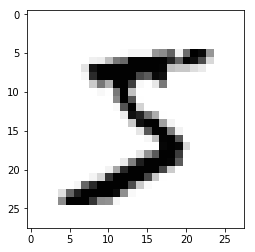

In [1]:
import tensorflow as tf
from tensorflow import InteractiveSession
s = InteractiveSession()
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [26]:
import numpy as np

In [2]:
input_shape = (None, 28*28)
hidden_1 = 1000
hidden_2 = 10

In [3]:
input_X = tf.placeholder(dtype=tf.float32, shape=input_shape)
input_y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

input_X, input_y

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>)

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preproc_input(X, y):
    labels = LabelEncoder().fit_transform(y)[:, None]
    y = OneHotEncoder().fit_transform(labels).todense()

    X = X.reshape(X.shape[0], 28*28)
    return X, y

In [5]:
X_train, y_train = preproc_input(X_train, y_train)

In [32]:
X_val, y_val = preproc_input(X_val, y_val)

In [6]:
X_train.shape, y_train.shape

((50000, 784), (50000, 10))

In [28]:
weights_1 = tf.Variable(dtype=tf.float32, 
                        initial_value=tf.random_normal(shape=(28*28, hidden_1)), 
                        expected_shape=(28*28, hidden_1))
bias_1 = tf.Variable(dtype=tf.float32, 
                     initial_value=tf.ones((1, hidden_1)),
                     expected_shape=(1, hidden_1))

weights_2 = tf.Variable(dtype=tf.float32, 
                        initial_value=tf.random_normal(shape=(hidden_1, hidden_2)), 
                        expected_shape=(hidden_1, hidden_2))
bias_2 = tf.Variable(dtype=tf.float32, 
                     initial_value=tf.ones((1, hidden_2)),
                     expected_shape=(1, hidden_2))
weights_1, weights_2, bias_1, bias_2

(<tf.Variable 'Variable_8:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(1000, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(1, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(1, 10) dtype=float32_ref>)

In [29]:
input_1 = tf.nn.softmax(tf.add(tf.matmul(input_X, weights_1), bias_1))
input_2 = tf.nn.softmax(tf.add(tf.matmul(input_1, weights_2), bias_2))

input_1, input_2

(<tf.Tensor 'Softmax_8:0' shape=(?, 1000) dtype=float32>,
 <tf.Tensor 'Softmax_9:0' shape=(?, 10) dtype=float32>)

In [30]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=input_y, logits=input_2)

In [33]:
correct_answers = tf.equal(tf.argmax(input_y, 1), tf.argmax(input_2, 1))
acc = tf.reduce_mean(tf.cast(correct_answers, tf.float32))

In [35]:
optimizer = tf.train.AdamOptimizer().minimize(loss)
s.run(tf.global_variables_initializer())

for i in range(1000):
    indices = np.random.choice(X_train.shape[0], 100)
    s.run(optimizer, {input_X: X_train[indices], input_y: y_train[indices]})
    loss_i = s.run(loss, {input_X: X_train[indices], input_y: y_train[indices]})
    if i % 10 == 0:         
        print(weights_1.eval().sum(), weights_2.eval().sum())
        accuracy = s.run(acc, feed_dict={input_X: X_val, input_y: y_val})
        print(f'accuracy = {accuracy}')
        print("loss at iter %i: %.4f" % (i, loss_i))

-319.924 75.1845
accuracy = 0.0892999991774559
loss at iter 0: 2.3009
-266.85 61.8771
accuracy = 0.1014999970793724
loss at iter 10: 2.2884
-241.709 49.1143
accuracy = 0.11100000143051147
loss at iter 20: 2.3004
-227.305 37.2425
accuracy = 0.121799997985363
loss at iter 30: 2.2917
-217.889 25.8747
accuracy = 0.13609999418258667
loss at iter 40: 2.2617
-228.378 15.2191
accuracy = 0.15610000491142273
loss at iter 50: 2.2642
-235.194 4.76494
accuracy = 0.17159999907016754
loss at iter 60: 2.2591
-241.891 -5.63722
accuracy = 0.1867000013589859
loss at iter 70: 2.2720
-263.128 -15.9101
accuracy = 0.2013999968767166
loss at iter 80: 2.2707
-306.293 -25.955
accuracy = 0.2184000015258789
loss at iter 90: 2.2405
-342.659 -36.1223
accuracy = 0.23829999566078186
loss at iter 100: 2.2513
-382.238 -46.3113
accuracy = 0.2583000063896179
loss at iter 110: 2.2597
-414.61 -55.7037
accuracy = 0.2808000147342682
loss at iter 120: 2.2279
-441.565 -65.3749
accuracy = 0.29989999532699585
loss at iter 130: 2

In [39]:
s.run(tf.global_variables_initializer())
res = s.run(loss_custom, feed_dict={input_X: X_train, input_y: y_train})
print(res)

0.230221


In [41]:
res


0.23022071

In [32]:
loss_custom = tf.reduce_mean((-1) * tf.multiply(input_y, tf.log(input_2)))
loss_custom

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>

In [33]:
loss_realised = tf.losses.softmax_cross_entropy(input_y, input_2)
loss_realised

<tf.Tensor 'softmax_cross_entropy_loss_1/value:0' shape=() dtype=float32>

In [34]:
loss_alien = tf.reduce_mean(-1*tf.nn.softmax_cross_entropy_with_logits(logits=input_2, labels=input_y))
loss_alien

<tf.Tensor 'Mean_7:0' shape=() dtype=float32>